Course Nmae: CSE 7345 Advanced Application Programming

Student Name: Zhenxuan Ouyang

SMU ID: 47784546

Quest Name: Pandas 2 !!!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part A: States and area codes

In [2]:
df = pd.read_csv("states.areacodes.csv")
# Drop the 'Washington,DC'
df = df[df.State != 'Washington,DC']
df

,Area code,State,State code
0,201,New Jersey,NJ
2,203,Connecticut,CT
3,205,Alabama,AL
4,206,Washington,WA
5,207,Maine,ME
6,208,Idaho,ID
7,209,California,CA
8,210,Texas,TX
9,212,New York,NY
10,213,California,CA


In [3]:
# Groupby and count() the state times
df_group = df.groupby(['State'], sort = True, as_index = False)
df2 = df_group.count()

In [4]:
# Rename the columns and drop columns which are not used
df3 = df2.rename(index = str,columns={"Area code":"times"})
df4 = df3.drop(columns = 'State code')
# Select State which appear 1 time
df4[df4.times==1]

,State,times
1,Alaska,1
7,Delaware,1
10,Hawaii,1
11,Idaho,1
18,Maine,1
25,Montana,1
28,New Hampshire,1
30,New Mexico,1
33,North Dakota,1
38,Rhode Island,1


# Part B: Zipcodes and States

In [5]:
df = pd.read_csv('zipcodes.states.gps.csv')


In [6]:
# Groupby the data and count() times
df_group = df.groupby(['state'], sort=True, as_index=False)
df2 = df_group.count()

# Drop other columns and rename the column
df3 = df2.drop(columns = {'latitude','longitude','city','county'})
df4 = df3.rename(index = str, columns = {"zip_code":"times"})

# Sort the DataFrame
df5 = df4.sort_values(by=['times'], ascending = False)


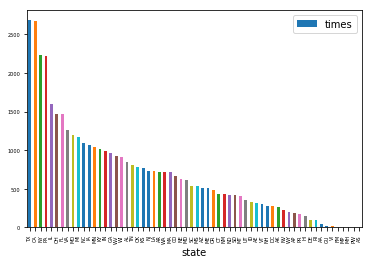

In [7]:
# Plot the data in a bar chart
df5.plot(y = 'times',x = 'state', kind = 'bar', fontsize=5)

# Part C: Films

In [8]:
df = pd.read_csv('films2.csv')

In [9]:
# Add a column the same as 'Subject'
df['Subject2']=df['Subject']
# When values in 'Subject' is 'Westerns', set the 'Subject2' in the same row 'Western', and use 'Subject2' to replace 'Subject'
df.loc[df['Subject'] =='Westerns','Subject2']= 'Western'

In [10]:
# Groupby the table and count it times
df_group = df.groupby(['Subject2','Actor'])
df2 = df_group.count()

In [11]:
# Have a specific slice of Groupby object
df_action = df2.loc[('Action',slice(None)),:]

In [12]:
# Get the first max row
df3 = df_action[df_action['Year'] == df_action['Year'].max()]

In [13]:
list_index = ['Comedy','Drama','Horror','Mystery','Science Fiction','War','Western']
# Merge each row of max value into one DataFrame
for i in list_index:
    df_tmpaction =  df2.loc[(i,slice(None)),:]
    df_tmpdf = df_tmpaction[df_tmpaction['Year'] == df_tmpaction['Year'].max()]
    df3 = pd.concat([df3, df_tmpdf])
    
# Rename the column to 'nFilms' and Drop other useless columns
df4 = df3.rename(index = str, columns = {"Year":"nFilms"})
df5 = df4.drop(columns = {'Length','Title','Subject','Actress','Director','Popularity','Awards','*Image,,,,,'})
df5

nFilms
Subject2        Actor                   
Action          Connery, Sean         15
Comedy          Sellers, Peter        22
Drama           Brando, Marlon        17
Horror          Ford, Wallace          3
Mystery         Connery, Sean          3
                Douglas, Michael       3
                Grant, Cary            3
Science Fiction Hamill, Mark           3
War             Wayne, John           10
Western         Wayne, John           46

# Part D: Stock Trading Algorithm with Moving Averages (MA)

In [14]:
# Read .csv file and sort it by 'Date'
df = pd.read_csv('SPY.histdata.csv', parse_dates = ['Date'])
df2 = df.sort_values(by=['Date'], ascending = True)

In [15]:
# Drop the NaN rows
df2['MA100'] = df2['SPY'].rolling(100).mean()
df2.dropna()

,Date,SPY,MA100
4602,2000-05-24,99.5118,101.376287
4601,2000-05-25,97.8044,101.325023
4600,2000-05-26,97.9153,101.315119
4599,2000-05-30,101.1082,101.335375
4598,2000-05-31,101.3300,101.373773
4597,2000-06-01,103.1038,101.373290
4596,2000-06-02,104.8998,101.387229
4595,2000-06-05,104.3898,101.408453
4594,2000-06-06,103.9241,101.435194
4593,2000-06-07,104.6448,101.455429


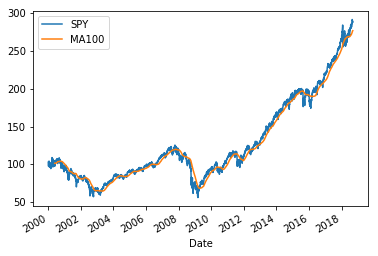

In [16]:
# Draw a chart
df2.plot(y = ['SPY','MA100'], x = 'Date')

In [17]:
# function that calculate the left money of MA method
def earnMoney():
    global money
    money = 1000
    tmpmoney = []
    global holdingFraction
    holdingFraction = 0.00
    do_money = []
    j = 0
    
    for i in range(0,4602):
        j = 4602 - i
        
        # BUY
        if df2.loc[j,'SPY']>df2.loc[j,'MA100']:
            if money>0.01:
                # Set a temp variavle to record the holdingFraction, and use the tmpholding to calculate the money
                holdingFraction = money/df2.loc[j,'SPY'] + holdingFraction
                # Clear the money
                money = 0.00
                # Record the money
                tmpmoney.append(money)
                # if do buy
                do_money.append(money)
            else:
                tmpmoney.append(money)
                
        # SELL
        else:
            if holdingFraction > 0.01:
                # Add the money
                money = holdingFraction * df2.loc[j,'SPY'] + money
                tmpmoney.append(money)
                do_money.append(money)
                # Clear the holdingFraction
                holdingFraction = 0
            else:
                tmpmoney.append(money)
    print("Money: ")
    print(money)
    print("HoldingFraction: ")
    print(holdingFraction)

In [18]:
# Show how much money I left and how many fractions I am holding
earnMoney()
holdingFraction

Money: 
0.0
HoldingFraction: 
7.528899214172473


7.528899214172473

In [19]:
# Show the latest price of 'SPY'
df2.loc[0,'SPY']

288.1

In [20]:
# If I sell my holding right now, the money percentage I can earn
earn = holdingFraction * df2.loc[0,'SPY'] - 1000
earn_p = earn/1000 * 100
str1 = str(earn_p) + '%'
str1

'116.90758636030895%'

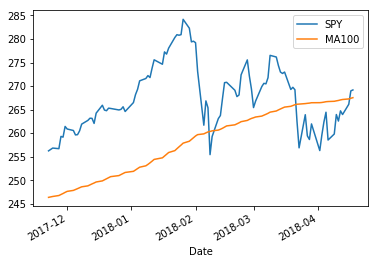

In [21]:
# In the latest 100 days, 'SPY' > 'MA100', so I use all my moeny to buy 'SPY'
df4 = df2.iloc[range(4502,4602)]
last100d = df4.plot(y=['SPY','MA100'],x='Date')

In [22]:
# Function of buy-hold stragegy
def buyhold():
    # j = 0
    money_bh = 1000.00
    tmp_moneybh = []
    holdingFraction_bh = 0.00
    
    for i in range(0, 4602):
        j = 4602-i
        if df2.loc[j,'SPY']>df2.loc[j,'MA100']:
            if money_bh>0.01:
                holdingFraction_bh = money_bh/df2.loc[j,'SPY'] + holdingFraction_bh
                money_bh = 0.00
                tmp_moneybh.append(money_bh)
                break

    for i in range(0,4602):
        if df2.loc[i,'SPY']<df2.loc[i,'MA100']:
            money_bh = holdingFraction_bh * df2.loc[i,'SPY']
            holdingFraction_bh = 0.00
            break
    return money_bh

In [23]:
buyhold_earn = buyhold() - 1000.00
buyhold_earn_p = buyhold_earn/1000.00 * 100
str2 = str(buyhold_earn_p)+'%'
str2

'159.75512056781614%'

In [24]:
# str1 is the profit percentage of my algorithm of MA100
# str2 is the profit of BUY-HOLD stragegy

# str2 is better, Buy-Hold is better
print('str1 = ')
print(str1)
print('str2 = ')
print(str2)

str1 = 
116.90758636030895%
str2 = 
159.75512056781614%


In [25]:
# function that return the money list (each buy and sell)
def earnMoney2():
    money = 1000.00
    tmpmoney = []
    holdingFraction = 0.00
    do_money = []
    j = 0
    for i in range(0,4602):
        j = 4602 - i
        if df2.loc[j,'SPY']>df2.loc[j,'MA100']:
            if money>0.01:
                # Set a temp variavle to record the holdingFraction, and use the tmpholding to calculate the money
                holdingFraction = money/df2.loc[j,'SPY'] + holdingFraction
                # Clear the money
                money = 0.00
                # Record the money
                tmpmoney.append(money)
                # if do buy
                do_money.append(money)
            else:
                tmpmoney.append(money)
        # SELL
        else:
            if holdingFraction > 0.01:
                # Add the money
                money = holdingFraction * df2.loc[j,'SPY'] + money
                tmpmoney.append(money)
                do_money.append(money)
                # Clear the holdingFraction
                holdingFraction = 0
            else:
                tmpmoney.append(money)
    return do_money

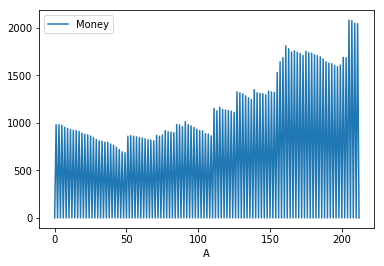

In [26]:
# Draw a chart, x is the number of trades, y is the money I hold when each trade is done
y_list = earnMoney2()
x_list = []
for i in range(0,len(earnMoney2())):
    x_list.append(i)
df_c = pd.DataFrame(y_list,index = x_list, columns={'Money'})
df_c['A'] = x_list
df_c.plot(y='Money',x='A')

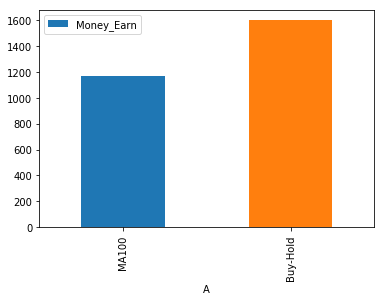

In [27]:
# Compare two different way of buying
x_list = ['MA100','Buy-Hold']
y_list = [earn, buyhold_earn]
df_d = pd.DataFrame(y_list,index = x_list, columns={'Money_Earn'})
df_d['A'] = x_list
df_d.plot(y='Money_Earn',x='A',kind='bar')

# Optional stragegy

In [28]:
# Drop the NaN rows
df2['MA350'] = df2['SPY'].rolling(350).mean()
df2.dropna()

,Date,SPY,MA100,MA350
4352,2001-05-22,94.2845,90.220544,98.380719
4351,2001-05-23,92.6854,90.191074,98.351447
4350,2001-05-24,92.9579,90.182431,98.334453
4349,2001-05-25,91.8607,90.179802,98.313819
4348,2001-05-29,91.1293,90.125608,98.295645
4347,2001-05-30,89.8528,90.069042,98.257647
4346,2001-05-31,90.3189,90.048313,98.219970
4345,2001-06-01,90.8783,90.026027,98.187429
4344,2001-06-04,91.3157,90.010573,98.159046
4343,2001-06-05,92.3627,89.989274,98.129735


In [29]:
# function that calculate the left money of MA method
moneytest = 1000.00
holdingFractiontest = 0.00
def earnMoney_optional():
    global money_option
    money_option = 1000
    tmpmoney = []
    global holdingFraction_option
    holdingFraction_option = 0.00
    do_money = []
    j = 0
    
    for i in range(0,4602):
        j = 4602 - i
        
        # BUY
        if df2.loc[j,'SPY']>df2.loc[j,'MA350']:
            if money_option>0.01:
                # Set a temp variavle to record the holdingFraction, and use the tmpholding to calculate the money
                holdingFraction_option = money_option/df2.loc[j,'SPY'] + holdingFraction_option
                # Clear the money
                money_option = 0.00
                # Record the money
                tmpmoney.append(money_option)
                # if do buy
                do_money.append(money_option)
            else:
                tmpmoney.append(money_option)
                
        # SELL
        else:
            if holdingFraction_option > 0.01:
                # Add the money
                money_option = holdingFraction_option * df2.loc[j,'SPY'] + money_option
                tmpmoney.append(money_option)
                do_money.append(money_option)
                # Clear the holdingFraction
                holdingFraction_option = 0
            else:
                tmpmoney.append(money_option)
    print("Money: ")
    print(money_option)
    print("HoldingFraction: ")
    print(holdingFraction_option)

In [30]:
# MA350 is the best MA stragegy, at the end of process, I can hold 14.00 of 'SPY'
earnMoney_optional()

Money: 
0.0
HoldingFraction: 
14.002777309454844


In [31]:
# Calculate the percentage of profit
earn_option = holdingFraction_option * df2.loc[0,'SPY'] - 1000
earn_option1 = earn_option/1000.00 * 100
str3 = str(earn_option1) + '%'
str3

'303.4200142853941%'

In [32]:
df2.loc[4602,'SPY']

99.5118